In [ ]:
# connect to drive here
import os, sys
from google.colab import drive
drive.mount('/content/drive')
colab_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', colab_path)
sys.path.insert(0,colab_path)

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv(r"/content/drive/MyDrive/Final Project/Field Project/NER - IOB/All_with_features.csv")

In [ ]:
df.head(2)

,word,tag,Paragraph_place,Paragraph,Sentence,POS,Lemma,Dependency_pars
0,Rydberg,B,A Rydberg 1,Rydberg atomic sensors and receivers have enab...,['Rydberg atomic sensors and receivers have en...,PROPN,Rydberg,compound
1,atomic,I,A Rydberg 1,Rydberg atomic sensors and receivers have enab...,['Rydberg atomic sensors and receivers have en...,ADJ,atomic,amod


In [ ]:
df['Lemma'] = df['Lemma'].str.lower()
df.head(2)

,word,tag,Paragraph_place,Paragraph,Sentence,POS,Lemma,Dependency_pars
0,Rydberg,B,A Rydberg 1,Rydberg atomic sensors and receivers have enab...,['Rydberg atomic sensors and receivers have en...,PROPN,rydberg,compound
1,atomic,I,A Rydberg 1,Rydberg atomic sensors and receivers have enab...,['Rydberg atomic sensors and receivers have en...,ADJ,atomic,amod


In [ ]:
df_2 = df.dropna()
df_2.isnull().values.any().sum().sum()

0

In [ ]:
import numpy as np
df_2.iloc[np.r_[0:2, -2:0]]

,word,tag,Paragraph_place,Paragraph,Sentence,POS,Lemma,Dependency_pars
0,Rydberg,B,A Rydberg 1,Rydberg atomic sensors and receivers have enab...,['Rydberg atomic sensors and receivers have en...,PROPN,rydberg,compound
1,atomic,I,A Rydberg 1,Rydberg atomic sensors and receivers have enab...,['Rydberg atomic sensors and receivers have en...,ADJ,atomic,amod
104310,article,O,The truth 40,The author(s) received no financial support fo...,['The author(s) received no financial support ...,NOUN,article,pobj
104311,.,O,The truth 40,The author(s) received no financial support fo...,['The author(s) received no financial support ...,PUNCT,.,punct


In [ ]:
import spacy
import pandas as pd

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

def lemmatize_paragraph(paragraph):
    # Process the paragraph using SpaCy
    doc = nlp(paragraph)
    # Lemmatize and lower each token, then join them back into a paragraph
    lemmatized_paragraph = " ".join([token.lemma_.lower() for token in doc])
    return lemmatized_paragraph

# Assuming 'df' is your DataFrame
def add_lemmatized_column(df):
    # Apply the lemmatize_paragraph function to each paragraph in the 'Paragraph' column
    df['Paragh_lemma'] = df['Paragraph'].apply(lemmatize_paragraph)
    return df

In [ ]:
df_2 = add_lemmatized_column(df_2)

<ipython-input-35-ff0f7ab15ab8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Paragh_lemma'] = df['Paragraph'].apply(lemmatize_paragraph)


In [ ]:
df_2.iloc[np.r_[0:2, -2:0]]

,word,tag,Paragraph_place,Paragraph,Sentence,POS,Lemma,Dependency_pars,Paragh_lemma
0,Rydberg,B,A Rydberg 1,Rydberg atomic sensors and receivers have enab...,['Rydberg atomic sensors and receivers have en...,PROPN,rydberg,compound,rydberg atomic sensor and receiver have enable...
1,atomic,I,A Rydberg 1,Rydberg atomic sensors and receivers have enab...,['Rydberg atomic sensors and receivers have en...,ADJ,atomic,amod,rydberg atomic sensor and receiver have enable...
104310,article,O,The truth 40,The author(s) received no financial support fo...,['The author(s) received no financial support ...,NOUN,article,pobj,the author(s ) receive no financial support fo...
104311,.,O,The truth 40,The author(s) received no financial support fo...,['The author(s) received no financial support ...,PUNCT,.,punct,the author(s ) receive no financial support fo...


In [ ]:
df_2.to_csv(r"/content/drive/MyDrive/Final Project/Field Project/NER - IOB/paragh_lemma.csv")

In [ ]:
import pandas as pd
df_2 = pd.read_csv(r"/content/drive/MyDrive/Final Project/Field Project/NER - IOB/paragh_lemma.csv")

In [ ]:
#the correct code
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract document name
df_2['Doc_Name'] = df_2['Paragraph_place'].str.extract(r'(^.+ \d+)', expand=False)

# Function to calculate TF-IDF and add to new column
def calculate_tfidf(df):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Paragh_lemma'])
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Map lemmas to their TF-IDF scores
    lemma_to_tfidf = {}
    for i, paragraph in enumerate(df['Paragh_lemma']):
        tfidf_scores = zip(feature_names, tfidf_matrix[i].toarray()[0])
        for word, score in tfidf_scores:
            if word in lemma_to_tfidf:
                lemma_to_tfidf[word].append(score)
            else:
                lemma_to_tfidf[word] = [score]

    # Create a column for the TF-IDF scores of the lemmas
    df['Tfidf_lemma'] = df.apply(lambda row: lemma_to_tfidf.get(row['Lemma'], [0])[0], axis=1)
    return df

<ipython-input-39-46b70bd81dc8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Doc_Name'] = df_2['Paragraph_place'].str.extract(r'(^.+ \d+)', expand=False)


In [ ]:
df_Tfidf_lemma = df_2.copy()
# Apply TF-IDF calculation to each document group
df_Tfidf_lemma = df_Tfidf_lemma.groupby('Doc_Name').apply(calculate_tfidf)


In [ ]:
df_Tfidf_lemma.iloc[np.r_[0:2, -2:0]]

word tag       Paragraph_place  \
Doc_Name                                                        
A Rydberg 1          0      Rydberg   B           A Rydberg 1   
                     1       atomic   I           A Rydberg 1   
global enviornment 9 83196  systems   I  global enviornment 9   
                     83197        .   O  global enviornment 9   

                                                                    Paragraph  \
Doc_Name                                                                        
A Rydberg 1          0      Rydberg atomic sensors and receivers have enab...   
                     1      Rydberg atomic sensors and receivers have enab...   
global enviornment 9 83196  While getting finished garments to consumers i...   
                     83197  While getting finished garments to consumers i...   

                                                                     Sentence  \
Doc_Name                                                                        
A Rydberg 1          0      ['Rydberg atomic sensors and receivers have en...   
                     1      ['Rydberg atomic sensors and receivers have en...   
global enviornment 9 83196  ['While getting finished garments to consumers...   
                     83197  ['While getting finished garments to consumers...   

                              POS    Lemma Dependency_pars  \
Doc_Name                                                     
A Rydberg 1          0      PROPN  rydberg        compound   
                     1        ADJ   atomic            amod   
global enviornment 9 83196   NOUN   system            dobj   
                     83197  PUNCT        .           punct   

                                                                 Paragh_lemma  \
Doc_Name                                                                        
A Rydberg 1          0      rydberg atomic sensor and receiver have enable...   
                     1      rydberg atomic sensor and receiver have enable...   
global enviornment 9 83196  while get finish garment to consumer in the hi...   
                     83197  while get finish garment to consumer in the hi...   

                                        Doc_Name  Tfidf_lemma  
Doc_Name                                                       
A Rydberg 1          0               A Rydberg 1     0.168232  
                     1               A Rydberg 1     0.056077  
global enviornment 9 83196  global enviornment 9     0.038208  
                     83197  global enviornment 9     0.000000

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def encode_and_normalize(df, column):
    # Step 1: Encode the column using LabelEncoder
    le = LabelEncoder()
    encoded_values = le.fit_transform(df[column])

    # Step 2: Normalize the encoded values to the range [0, 1]
    scaler = MinMaxScaler()
    normalized_values = scaler.fit_transform(encoded_values.reshape(-1, 1))

    # Step 3: Add the normalized values as a new column to the DataFrame
    new_column_name = f'normalized_{column}'
    df[new_column_name] = normalized_values

    return df


In [ ]:
df_temp_1 = df_Tfidf_lemma.copy()
df_temp_1 = encode_and_normalize(df_temp_1, 'POS')


In [ ]:
df_temp_1.head(2)

word tag Paragraph_place  \
Doc_Name                                     
A Rydberg 1 0  Rydberg   B     A Rydberg 1   
            1   atomic   I     A Rydberg 1   

                                                       Paragraph  \
Doc_Name                                                           
A Rydberg 1 0  Rydberg atomic sensors and receivers have enab...   
            1  Rydberg atomic sensors and receivers have enab...   

                                                        Sentence    POS  \
Doc_Name                                                                  
A Rydberg 1 0  ['Rydberg atomic sensors and receivers have en...  PROPN   
            1  ['Rydberg atomic sensors and receivers have en...    ADJ   

                 Lemma Dependency_pars  \
Doc_Name                                 
A Rydberg 1 0  rydberg        compound   
            1   atomic            amod   

                                                    Paragh_lemma     Doc_Name  \
Doc_Name                                                                        
A Rydberg 1 0  rydberg atomic sensor and receiver have enable...  A Rydberg 1   
            1  rydberg atomic sensor and receiver have enable...  A Rydberg 1   

               Tfidf_lemma  normalized_POS  
Doc_Name                                    
A Rydberg 1 0     0.168232          0.6875  
            1     0.056077          0.0000

In [ ]:
df_temp_2 = df_temp_1.copy()
df_temp_2 = encode_and_normalize(df_temp_2, 'Dependency_pars')


In [ ]:
df_temp_2.head(2)

word tag Paragraph_place  \
Doc_Name                                     
A Rydberg 1 0  Rydberg   B     A Rydberg 1   
            1   atomic   I     A Rydberg 1   

                                                       Paragraph  \
Doc_Name                                                           
A Rydberg 1 0  Rydberg atomic sensors and receivers have enab...   
            1  Rydberg atomic sensors and receivers have enab...   

                                                        Sentence    POS  \
Doc_Name                                                                  
A Rydberg 1 0  ['Rydberg atomic sensors and receivers have en...  PROPN   
            1  ['Rydberg atomic sensors and receivers have en...    ADJ   

                 Lemma Dependency_pars  \
Doc_Name                                 
A Rydberg 1 0  rydberg        compound   
            1   atomic            amod   

                                                    Paragh_lemma     Doc_Name  \
Doc_Name                                                                        
A Rydberg 1 0  rydberg atomic sensor and receiver have enable...  A Rydberg 1   
            1  rydberg atomic sensor and receiver have enable...  A Rydberg 1   

               Tfidf_lemma  normalized_POS  normalized_Dependency_pars  
Doc_Name                                                                
A Rydberg 1 0     0.168232          0.6875                    0.318182  
            1     0.056077          0.0000                    0.136364

In [ ]:
Input_df = df_temp_2[["word", "tag", "Tfidf_lemma", "normalized_POS", "normalized_Dependency_pars", "Paragraph_place"]]

In [ ]:
Input_df.reset_index()

,Doc_Name,level_1,word,tag,Tfidf_lemma,normalized_POS,normalized_Dependency_pars,Paragraph_place
0,A Rydberg 1,0,Rydberg,B,0.168232,0.6875,0.318182,A Rydberg 1
1,A Rydberg 1,1,atomic,I,0.056077,0.0000,0.136364,A Rydberg 1
2,A Rydberg 1,2,sensors,I,0.056077,0.4375,0.659091,A Rydberg 1
3,A Rydberg 1,3,and,I,0.224309,0.2500,0.272727,A Rydberg 1
4,A Rydberg 1,4,receivers,I,0.056077,0.4375,0.340909,A Rydberg 1
...,...,...,...,...,...,...,...,...
101562,global enviornment 9,83193,robust,I,0.038208,0.0000,0.136364,global enviornment 9
101563,global enviornment 9,83194,municipal,I,0.038208,0.0000,0.136364,global enviornment 9
101564,global enviornment 9,83195,waste,I,0.076416,0.4375,0.318182,global enviornment 9
101565,global enviornment 9,83196,systems,I,0.038208,0.4375,0.477273,global enviornment 9


In [ ]:
print(Input_df.columns)

Index(['word', 'tag', 'Tfidf_lemma', 'normalized_POS',
       'normalized_Dependency_pars', 'Paragraph_place'],
      dtype='object')


In [ ]:
Input_df.to_csv(r"/content/drive/MyDrive/Final Project/Field Project/NER - IOB/Input_df.csv")

In [ ]:
import pandas as pd
Input_df = pd.read_csv(r"/content/drive/MyDrive/Final Project/Field Project/NER - IOB/Input_df.csv")

In [ ]:
from sklearn.model_selection import train_test_split

grouped = Input_df.groupby('Paragraph_place')

sizes = grouped.size().cumsum() #cumulative size

train_size = 0.7 * sizes.iloc[-1]
val_size = 0.2 * train_size
test_size = sizes.iloc[-1] - train_size

#Train, test index based on 'Paragraph_place' column
train_idx = sizes[sizes <= train_size].index
test_idx = sizes[sizes > train_size].index


train_data_with_val = Input_df[Input_df['Paragraph_place'].isin(train_idx)]
test_data = Input_df[Input_df['Paragraph_place'].isin(test_idx)]

#Validation set
train_sizes = train_data_with_val.groupby('Paragraph_place').size().cumsum()
val_idx = train_sizes[train_sizes <= val_size].index
final_train_idx = train_sizes[train_sizes > val_size].index

val_data = train_data_with_val[train_data_with_val['Paragraph_place'].isin(val_idx)]
train_data = train_data_with_val[train_data_with_val['Paragraph_place'].isin(final_train_idx)]



In [ ]:
print(f'Training set size: {train_data.shape[0]}')
print(f'Validation set size: {val_data.shape[0]}')
print(f'Test set size: {test_data.shape[0]}')

Training set size: 56879
Validation set size: 14134
Test set size: 30554


In [ ]:
train_data.drop('Paragraph_place', axis=1, inplace=True)
val_data.drop('Paragraph_place', axis=1, inplace=True)
test_data.drop('Paragraph_place', axis=1, inplace=True)

<ipython-input-77-e17bdac5a2a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop('Paragraph_place', axis=1, inplace=True)
<ipython-input-77-e17bdac5a2a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data.drop('Paragraph_place', axis=1, inplace=True)
<ipython-input-77-e17bdac5a2a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop('Paragraph_place', axis=1, inplace=True)


In [ ]:
train_data.to_csv(r"/content/drive/MyDrive/Final Project/Field Project/NER - IOB/train_data_IOB.csv")
val_data.to_csv(r"/content/drive/MyDrive/Final Project/Field Project/NER - IOB/val_data_IOB.csv")
test_data.to_csv(r"/content/drive/MyDrive/Final Project/Field Project/NER - IOB/test_data_IOB.csv")


From here start for training

In [ ]:
import pandas as pd
train_data = pd.read_csv(r"/content/drive/MyDrive/Final Project/Field Project/NER - IOB/train_data_IOB.csv")
val_data = pd.read_csv(r"/content/drive/MyDrive/Final Project/Field Project/NER - IOB/val_data_IOB.csv")
test_data=pd.read_csv(r"/content/drive/MyDrive/Final Project/Field Project/NER - IOB/test_data_IOB.csv")

In [ ]:
X_train = train_data[['Tfidf_lemma', 'normalized_POS', 'normalized_Dependency_pars']]
y_train = train_data['tag']
X_val = val_data[['Tfidf_lemma', 'normalized_POS', 'normalized_Dependency_pars']]
y_val = val_data['tag']
X_test = test_data[['Tfidf_lemma', 'normalized_POS', 'normalized_Dependency_pars']]
y_test = test_data['tag']


In [ ]:
X_train

,Tfidf_lemma,normalized_POS,normalized_Dependency_pars
0,0.204598,1.0000,0.681818
1,0.409197,0.1875,0.227273
2,0.136399,0.9375,0.000000
3,0.204598,0.9375,0.022727
4,0.068199,0.3125,0.454545
...,...,...,...
56874,0.084819,0.9375,0.000000
56875,0.084819,0.0625,0.113636
56876,0.084819,0.0000,0.136364
56877,0.000000,0.4375,0.795455


In [ ]:
X_train.shape

(56879, 3)

In [ ]:
X_train.shape[1]

3

In [ ]:
X_val.shape[0]

14134

In [ ]:
X_train_array = X_train.values
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], 3, 1))
X_val_array = X_val.values
X_val_reshaped = X_val_array.reshape((X_val_array.shape[0], 3, 1))
X_test_array = X_test.values
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], 3, 1))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Flattening the DataFrame to a single array
y_train_flat = y_train.values.flatten()
y_val_flat = y_val.values.flatten()
y_test_flat = y_test.values.flatten()

In [ ]:
import numpy as np
unique_labels_train = np.unique(y_train_flat)
unique_labels_val = np.unique(y_val_flat)
unique_labels_test = np.unique(y_test_flat)


print("Unique labels in y_train:", unique_labels_train)
print("Unique labels in y_val:", unique_labels_val)
print("Unique labels in y_test:", unique_labels_test)

Unique labels in y_train: [',' 'B' 'I' 'O' 'P' 'o']
Unique labels in y_val: ['B' 'I' 'O' '[']
Unique labels in y_test: ['B' 'I' 'O' 'o']


In [ ]:
valid_labels = ['O', 'B', 'I']

invalid_labels_train = [label for label in unique_labels_train if label not in valid_labels]
invalid_labels_val = [label for label in unique_labels_val if label not in valid_labels]
invalid_labels_test = [label for label in unique_labels_test if label not in valid_labels]


y_train_replaced = y_train_flat.copy()
y_val_replaced = y_val_flat.copy()
y_test_replaced = y_test_flat.copy()

for invalid_label in invalid_labels_train:
    y_train_replaced[y_train_replaced == invalid_label] = 'O'

for invalid_label in invalid_labels_val:
    y_val_replaced[y_val_replaced == invalid_label] = 'O'

for invalid_label in invalid_labels_test:
    y_test_replaced[y_test_replaced == invalid_label] = 'O'

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
y_train_int = label_encoder.fit_transform(y_train_replaced)
y_val_int = label_encoder.transform(y_val_replaced)
y_test_int = label_encoder.transform(y_test_replaced)

In [ ]:
y_train_int

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
# for Dr.Gooch
df_train_sent = X_train.copy()

df_train_sent['int_label'] = y_train_int

df_train_sent.to_csv(r"/content/drive/MyDrive/Final Project/Field Project/NER - IOB/train_data_IOB_For_CRF.csv")

In [ ]:
from keras.utils import to_categorical

# Convert to one-hot encoded format
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_int, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val_int, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_int, num_classes=num_classes)

In [ ]:
! pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=6e12e06e3b50818a1d6527bc4d3e31d38955a2049d4805c5d53f80c66ce5acbe
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelEncoder
import numpy as np
import keras_tuner as kt
from keras.utils import to_categorical

In [ ]:
#this class is being used and is ok
# Seqeval is not compatible with TenserFlow so avoid using it
#from seqeval.metrics import classification_report, f1_score as seqeval_f1_score

class StorePredictionsCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(StorePredictionsCallback, self).__init__()
        self.validation_data = validation_data
        self.true_labels = []
        self.pred_labels = []

    def on_epoch_end(self, epoch, logs=None):
        val_data, val_labels = self.validation_data
        val_preds = self.model.predict(val_data)

        # Convert predictions to label indices
        val_preds = np.argmax(val_preds, axis=-1)
        val_labels = np.argmax(val_labels, axis=-1)

        # Store true and predicted labels
        self.true_labels.append(val_labels)
        self.pred_labels.append(val_preds)

        print(f"Epoch {epoch + 1}:")
        print(f"True Labels: {val_labels[:5]}")
        print(f"Pred Labels: {val_preds[:5]}")

# Initialize the StorePredictionsCallback
store_predictions_callback = StorePredictionsCallback(validation_data=(X_val_reshaped, y_val_one_hot))

In [ ]:
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()

    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {name: getattr(tf.keras.optimizers, name)() for name in optimizer_names}

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)
    optimizer = optimizer_objects[optimizer]

    inputs = tf.keras.layers.Input(shape=(3, 1))
    x = inputs
    for i in range(n_hidden):
        return_sequences = True if i < n_hidden - 1 else False
        x = tf.keras.layers.LSTM(n_neurons, activation=activation, return_sequences=return_sequences)(x)

    # Flatten the output of the LSTM layer
    x = tf.keras.layers.Flatten()(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=[tf.keras.metrics.CategoricalAccuracy()])

    return model

objective = kt.Objective("val_categorical_accuracy", direction="max")

random_search_tuner = kt.RandomSearch(
    build_model, objective=objective, max_trials=5,
    directory=(r"/content/drive/MyDrive/Final Project/Field Project/NER - IOB"), project_name="sequence-IOB-LSTM-Random2", seed=42)

validation_data = (X_val_reshaped, y_val_one_hot)

# Train the model with the callback
random_search_tuner.search(X_train_reshaped, y_train_one_hot, epochs=100,
                           validation_data=validation_data,
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=10), store_predictions_callback])



Trial 5 Complete [00h 02m 28s]
val_categorical_accuracy: 0.6254422068595886

Best val_categorical_accuracy So Far: 0.6254422068595886
Total elapsed time: 00h 08m 39s


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 36 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1778/1778 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - categorical_accuracy: 0.6589 - loss: 0.7495 - val_categorical_accuracy: 0.6254 - val_loss: 0.7876
Epoch 2/100
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.6589 - loss: 0.7493 - val_categorical_accuracy: 0.6254 - val_loss: 0.7848
Epoch 3/100
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.6589 - loss: 0.7358 - val_categorical_accuracy: 0.6254 - val_loss: 0.7521
Epoch 4/100
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.6589 - loss: 0.7120 - val_categorical_accuracy: 0.6254 - val_loss: 0.7455
Epoch 5/100
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.6589 - loss: 0.7076 - val_categorical_accuracy: 0.6254 - val_loss: 0.7423
Epoch 6/100
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.6589 - loss: 0.7035 - val_categorical_accuracy: 0.6254 - val_loss: 0.7364
Epoch 7/100
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.

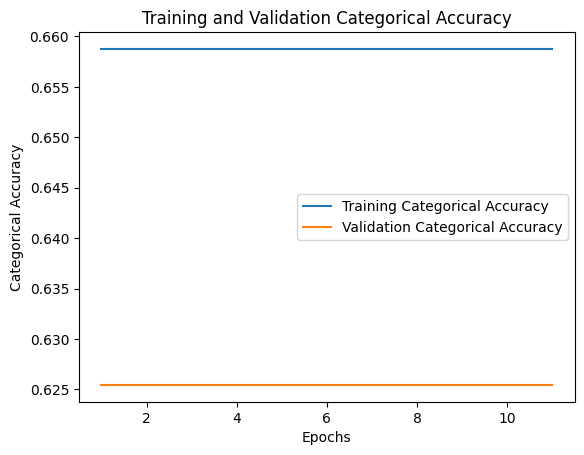

In [ ]:
import matplotlib.pyplot as plt

random_search_result = random_search_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = random_search_result.fit(X_train_reshaped, y_train_one_hot, epochs=100,
                validation_data=(X_val_reshaped, y_val_one_hot),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=10)])

Acc = history.history["categorical_accuracy"]
val_Acc = history.history["val_categorical_accuracy"]

# Plotting
epochs = range(1, len(Acc) + 1)

plt.plot(epochs, Acc, label="Training Categorical Accuracy")
plt.plot(epochs, val_Acc, label="Validation Categorical Accuracy")
plt.title("Training and Validation Categorical Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Categorical Accuracy")
plt.legend()
plt.show()

In [ ]:
# Save the weights
random_search_result.save(r"/content/drive/MyDrive/Final Project/Field Project/NER - IOB/random_search_result.h5")

In [ ]:
#Hyperband tunning
# Setting random seeds
np.random.seed(20)
tf.random.set_seed(20)

def build_model(hp, clear=True):
    if clear:
        tf.keras.backend.clear_session()

    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=2, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-1, sampling="log")
    optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]
    activation_functions = ['relu', 'softmax', 'tanh', 'sigmoid']

    optimizer_objects = {name: getattr(tf.keras.optimizers, name)() for name in optimizer_names}

    optimizer = hp.Choice("optimizer", values=optimizer_names)
    activation = hp.Choice("activation", values=activation_functions)
    optimizer = optimizer_objects[optimizer]

    inputs = tf.keras.layers.Input(shape=(3, 1))
    x = inputs
    for i in range(n_hidden):
        return_sequences = True if i < n_hidden - 1 else False
        x = tf.keras.layers.LSTM(n_neurons, activation=activation, return_sequences=return_sequences)(x)

    # Flatten the output of the LSTM layer
    x = tf.keras.layers.Flatten()(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=[tf.keras.metrics.CategoricalAccuracy()])

    return model

objective = kt.Objective("val_categorical_accuracy", direction="max")

hyperband_tuner = kt.Hyperband(
    build_model, objective=objective, max_epochs=100, factor=3,
    directory=(r"/content/drive/MyDrive/Final Project/Field Project/NER - IOB"), project_name="sequence-IOB-LSTM-Hyperband1", seed=42)

validation_data = (X_val_reshaped, y_val_one_hot)

# Train the model with the callback
hyperband_tuner.search(X_train_reshaped, y_train_one_hot, epochs=100,
                           validation_data=validation_data,
                           callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=10), store_predictions_callback])



Trial 254 Complete [00h 00m 54s]
val_categorical_accuracy: 0.6254422068595886

Best val_categorical_accuracy So Far: 0.625866711139679
Total elapsed time: 04h 06m 51s


Epoch 1/100
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - categorical_accuracy: 0.6587 - loss: 0.6985 - val_categorical_accuracy: 0.6257 - val_loss: 0.7337
Epoch 2/100
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.6589 - loss: 0.6955 - val_categorical_accuracy: 0.6257 - val_loss: 0.7312
Epoch 3/100
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - categorical_accuracy: 0.6589 - loss: 0.6927 - val_categorical_accuracy: 0.6254 - val_loss: 0.7289
Epoch 4/100
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.6589 - loss: 0.6904 - val_categorical_accuracy: 0.6253 - val_loss: 0.7272
Epoch 5/100
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.6590 - loss: 0.6889 - val_categorical_accuracy: 0.6251 - val_loss: 0.7261
Epoch 6/100
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.6589 - loss: 0.6880 - val_categorical_accuracy: 0.6249 - val_loss: 0.7253
Epoch 7/100
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_

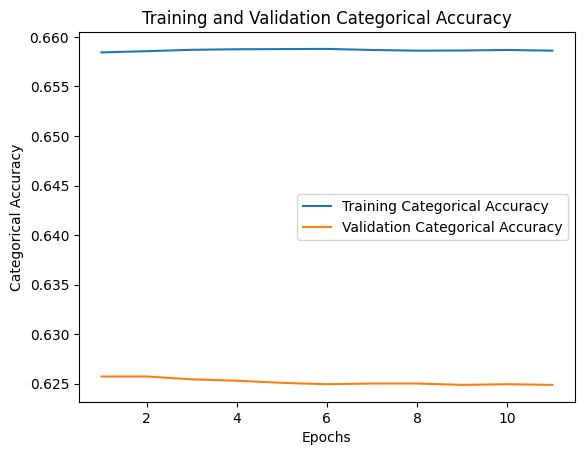

In [ ]:
import matplotlib.pyplot as plt

hyperband_search_result = hyperband_tuner.get_best_models(num_models=1)[0]

# Train the best model
history = hyperband_search_result.fit(X_train_reshaped, y_train_one_hot, epochs=100,
                validation_data=(X_val_reshaped, y_val_one_hot),
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=10)])

Acc = history.history["categorical_accuracy"]
val_Acc = history.history["val_categorical_accuracy"]

# Plotting
epochs = range(1, len(Acc) + 1)

plt.plot(epochs, Acc, label="Training Categorical Accuracy")
plt.plot(epochs, val_Acc, label="Validation Categorical Accuracy")
plt.title("Training and Validation Categorical Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Categorical Accuracy")
plt.legend()
plt.show()

In [ ]:
# Save the weights
hyperband_search_result.save(r"/content/drive/MyDrive/Final Project/Field Project/NER - IOB/hyperband_search_result.h5")

In [ ]:
test_loss, test_accuracy = hyperband_search_result.evaluate(X_test_reshaped, y_test_one_hot, verbose=2)

# Print the test results
print(f"Test Loss: {test_loss}")
print(f"Test Categorical Accuracy: {test_accuracy}")

955/955 - 2s - 2ms/step - categorical_accuracy: 0.6811 - loss: 0.6721
Test Loss: 0.6721351146697998
Test Categorical Accuracy: 0.6810892224311829
